## Handling images

We will work with images which are in **geotiff** format. These are standard image files (i.e. they are ``.tif`` files) but they also contain information on the coordinates and the base projection of the image. There are various tools for making and converting these images but one important thing to know is that they are the becoming a standard that you are very likely to encounter as a way to store data and deliver it on the web. If you download tiles of data served up as google earth layers, you may well find that you have a geotiff. 

Here is an example - it uses the **gdal** library for manipulating geospatial data. The image is a freely available download of the NASA *blue marble* image set which I retrieved for you.

In [2]:
%matplotlib inline

import cartopy
import gplately
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

In [3]:
globalmarble = gplately.download.get_raster("ETOPO1_tif")

Checking whether the requested files need to be updated...
Requested files are up-to-date!


In [5]:
globalmarble.shape

(2700, 5400, 3)

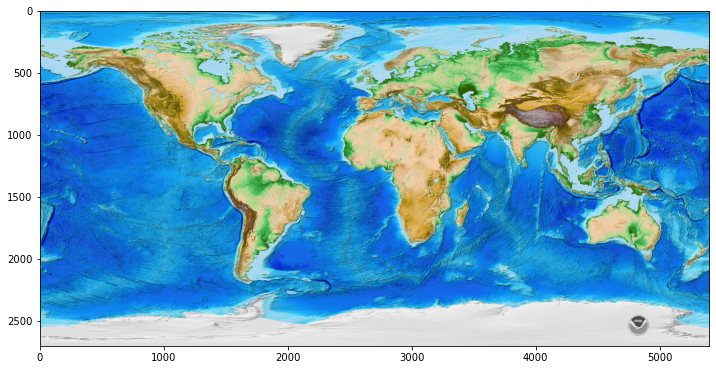

In [6]:
fig = plt.figure(figsize=(12, 12), facecolor="none")
plt.imshow(globalmarble.data)

This looks really nice but it is just the original image plotted in its original shape. 

The gdal object can tell you the projection which applies to the original data and various other attributes. This might not seems particularly useful at this point, but it is helpful to realise that there is a lot of information being passed around behind the scenes when you use these tools.


### Projections

What if we want to use a different projection for the image. For example, we might want to use this as a background to plot some other information. How does this work ?

Let's try what we used before to plot with a different projection. Specifically, let's try an orthographic projection which should wrap the image around a sphere and show us the disk from a particular orientation. Here is one I made earlier ... the output should look like this:

<img src="../../Data/Reference/OrthographicProjectionBlueMarble.png" width=30%>


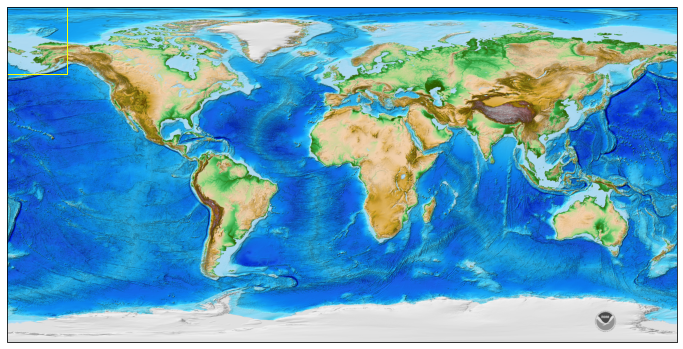

In [9]:
fig = plt.figure(figsize=(12, 12), facecolor="none")
ax = plt.axes(projection=ccrs.Orthographic())
plt.imshow(globalmarble.data, zorder=0, origin='upper')
ax.coastlines(color="Yellow", zorder=1)  
plt.show()


OK, that didn't look like the sample image that I claimed it should and the reason is that we didn't tell the plotting routines what the original projection for the data was. Here is the fix: tell the ``imshow`` command the transformation of the original data - (this can take a little while to process).

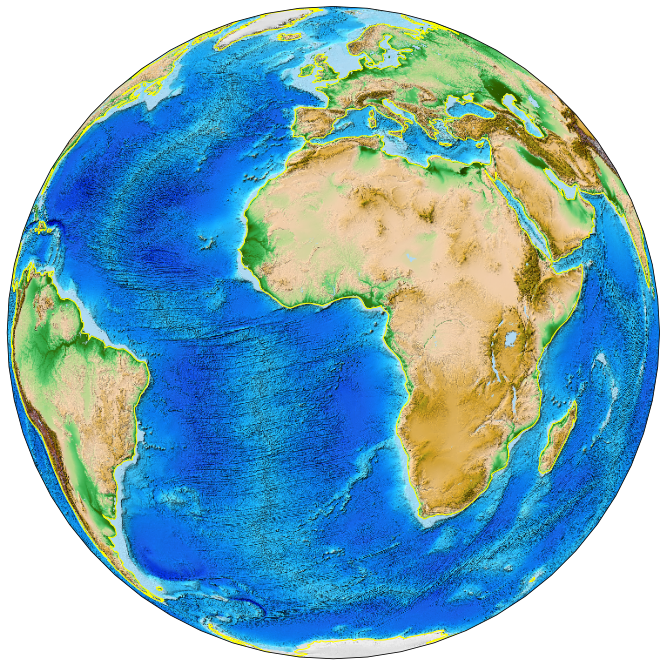

In [10]:
fig = plt.figure(figsize=(12, 12), facecolor="none")
ax = plt.axes(projection=ccrs.Orthographic())
plt.imshow(globalmarble.data, zorder=0, origin='upper', transform=ccrs.PlateCarree())
ax.coastlines(color="Yellow", zorder=1)  

plt.show()


You can try other projections here, though I have found quite a few do not behave in quite the way you expect!
https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html

All rasters in lon/lat coordinates have the base projection of **PlateCarree**. Note that we can define a variable which points to this function and pass it into the transform argument of ``imshow``